In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import os 
import sys 
from astropy.io import fits 
import pandas as pd 
import tensorflow as tf 
sys.path.append("C:/Users/User/dev/kepler")
%load_ext autoreload
%autoreload 2
from python_tools.plot import plot, plot1d
import tensorflow.keras.backend as K  

In [1]:
from models import *
from utils import * 
from dr25 import * 

In [4]:
m = load_model()

loading model from C:\Users\User\dev\kepler\models\train.h5
finished loading


In [1]:
g = get_binned_normalized_flux_by_IDs('3858919', overwrite=1)[1][1]

NameError: name 'get_binned_normalized_flux_by_IDs' is not defined

In [3]:
l = get_binned_local_view_by_IDs('3858919', overwrite=1)[1][1]

loading 1/1

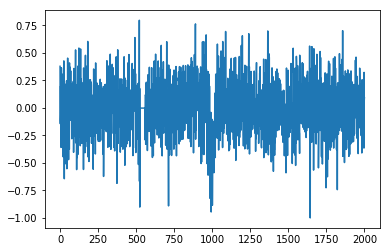

In [8]:
plt.plot(g)

In [161]:
m.predict([g.reshape(1,2001, 1), l.reshape(1, 201, 1)])

array([[0.45994008]], dtype=float32)

In [184]:
time, flux = get_time_flux_by_ID('3858919')
period = 5.0926
duration = 0.141625
t0 = 133.451

In [182]:
t, f = fold(time, flux,period, t0 )

In [186]:
get_summary_by_IDs('3858919')

{
  "period": [
    [
      "0",
      25.9508
    ],
    [
      "0",
      25.9537
    ]
  ],
  "tce duration": [
    [
      "0",
      0.5812499999999999
    ],
    [
      "0",
      0.46249999999999997
    ]
  ],
  "tce epoch": [
    [
      "0",
      148.987
    ],
    [
      "0",
      154.843
    ]
  ]
}


In [189]:
test_kepid(m, '3858919')

{1: 0.71227604, 2: 0.9952041}

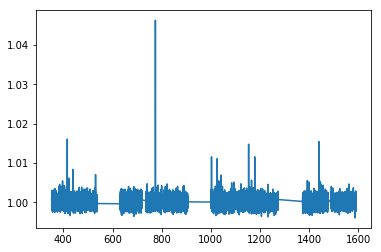

In [185]:
plt.plot(time , flux)

In [177]:
g = process_global(time, flux, 5.0926,133.451, 0.141625)
l = process_local(time, flux, 5.0926, 133.451, 0.141625)

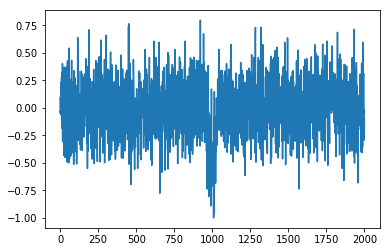

In [179]:
plt.plot(g)

In [38]:
from scipy.interpolate import interp1d

In [39]:
g_bin = np.arange(2001)
l_bin = np.arange(201)

In [137]:
n = 15

lh = 201 // n
gh = 2001 // n

In [138]:
i = 0
pred = []
g_flux = [] 
l_flux = []

g_blocked_bin = [] 
l_blocked_bin = [] 

while i < n:
    tmp_local = l.copy() 
    tmp_global = g.copy() 
    blocked_bin.append(np.arange(i*lh, (i+1)*lh))
    tmp_local[i*lh:(i+1)*lh] = 0
    tmp_global[i*gh:(i+1)*gh] = 0
    g_flux.append(tmp_global)
    l_flux.append(tmp_local)
    pred.append(m.predict([tmp_global.reshape(1,2001,1), 
                          tmp_local.reshape(1,201,1)]).ravel()[0])
    i += 1


In [139]:
pred

[0.6962688,
 0.7243828,
 0.5488883,
 0.83209324,
 0.13175099,
 0.49683914,
 0.3310809,
 0.017280165,
 0.13706145,
 0.0050996877,
 0.8847363,
 0.87480444,
 0.17385854,
 0.36515975,
 0.37044498]

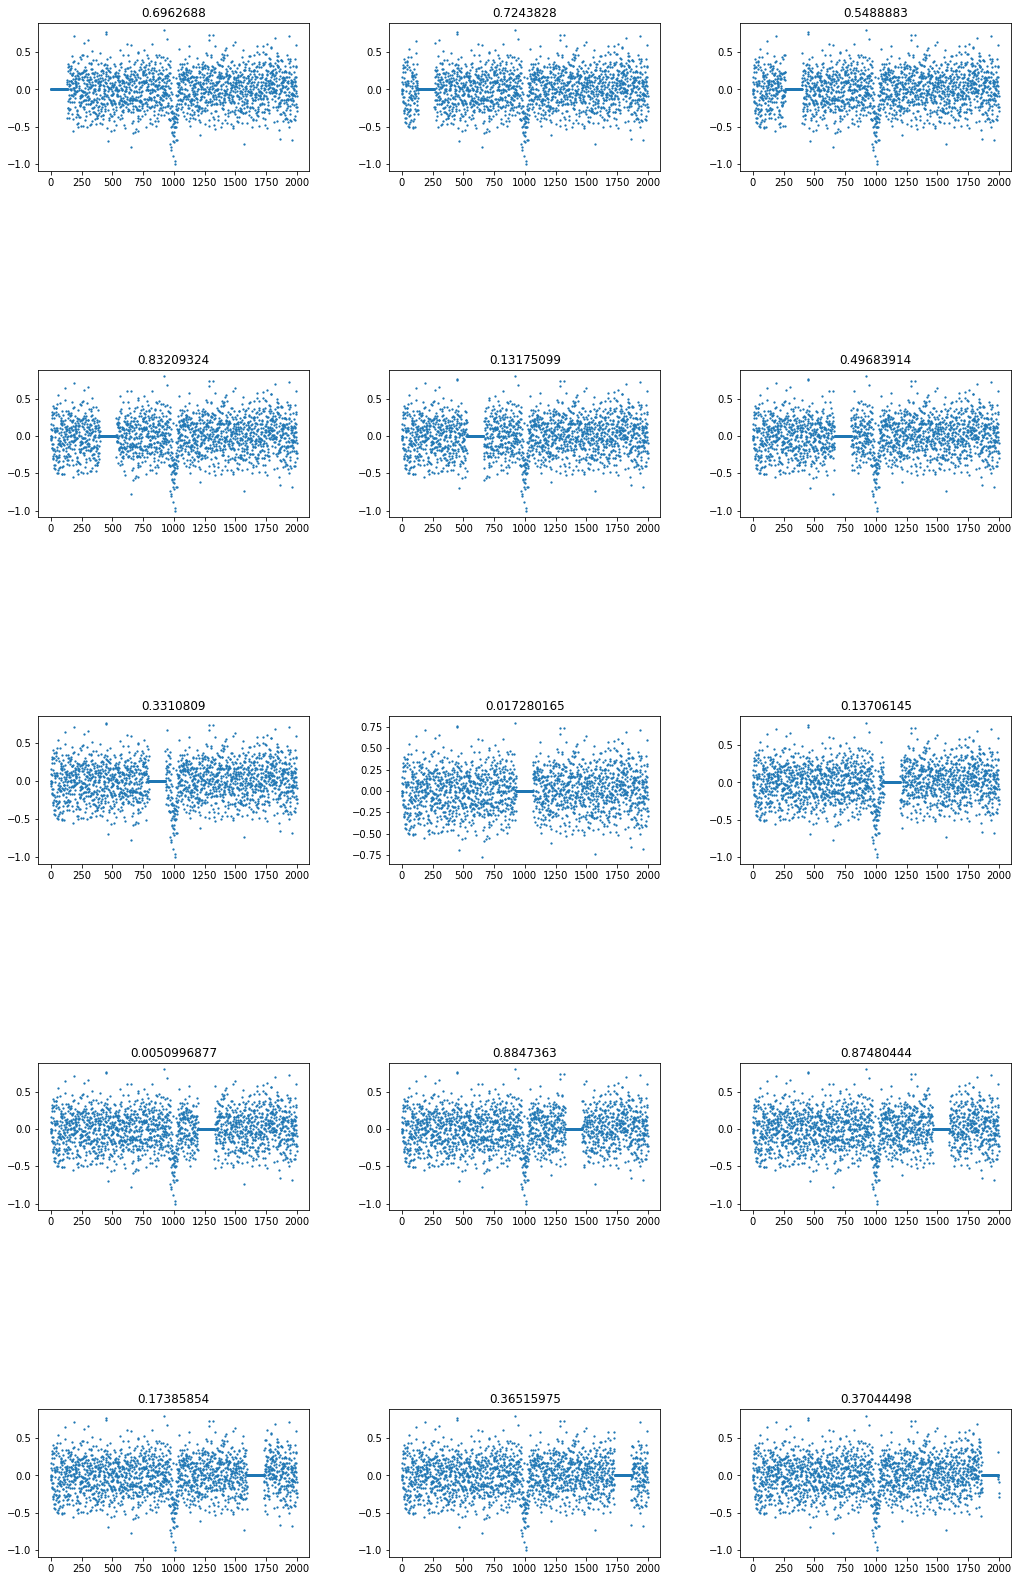

In [141]:
plot1d(g_flux, 5,3, labels=pred, ms=2.5, shuffle=0)